## Assignment-03 First Step of Machine Learning: Model and Evaluation

同学们，今天我们的学习了基本的机器学习概念，相比你已经对机器学习的这些方法有一个基本的认识了。值得说明的是，机器学习不仅仅是一系列方法，更重要的是一种思维体系，即：依据以往的、现有的数据，构建某种方法来解决未见过的问题。而且决策树，贝叶斯只是实现这个目标的一个方法，包括之后的神经网络。很有可能有一天，神经网络也会被淘汰，但是重要的是我们要理解机器学习的目标，就是尽可能的自动化解决未知的问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1571556399207&di=4a97dc15ad08dd49d3748d1edf6109b3&imgtype=0&src=http%3A%2F%2Fc.hiphotos.baidu.com%2Fzhidao%2Fwh%3D450%2C600%2Fsign%3Dae742c6aedcd7b89e93932873a146e91%2F5d6034a85edf8db1b16050c40223dd54574e74c7.jpg)

## Part-1 Programming Review 编程回顾

#### 1. Re-code the Linear-Regression Model using scikit-learning(10 points)

<评阅点>： 
> + 是否完成线性回归模型 (4')
+ 能够进行预测新数据(3')
+ 能够进行可视化操作(3')

In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from icecream import ic

$$ Linear\ Regresion\ Model\ \Rightarrow y=ax+b $$

In [3]:
def linear_regression(X, y):
    """ Using linear regression model to fit dataset
    
    Fit the dataset on linear regression model provided by sklearn module. 
    Output the training score, training result, visualize the data and return the predict function
    
    Args:
        X: A set of variable x1, x2, x3, ..., xn
        y: A set of dependent variable y1, y2, y3, ..., yn 
    
    Returns:
        predict_func: predict function that accept new x and return predicted value y
    """
    X = np.array(X).reshape(-1, 1) # transfer 1*n array to n*1
    y = np.array(y)
    
    # training
    model = LinearRegression()
    model.fit(X, y)
    
    # training result
    score = model.score(X, y)
    coef = model.coef_[0]
    intercept = model.intercept_
    
    # print the result
    ic(score)
    ic(coef)
    ic(intercept)
    
    # the predict function
    def f(x):
        return coef * x + intercept
    
    # draw the line
    plt.scatter(X, y)
    plt.plot(X, f(X), color='red');
    
    return f

##### Test the model 

In [4]:
# Generate test data
import random
def assuming_function(x):
    # Salary vs cost on foods
    return 0.3 * x + 332 + random.randint(-500, 500)
X = np.random.randint(800, 20000, size=(100))
y = [assuming_function(x) for x in X]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)
ic| score: 0.9688182054297995
ic| coef: 0.2935925460520709
ic| intercept: 357.36552778192754


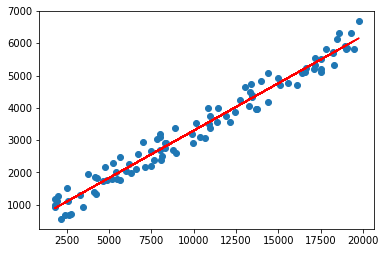

In [5]:
# Testing
predict_func = linear_regression(X, y)

In [6]:
# Predict
predict_func(9000)

2999.6984422505657

#### 2. Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

<评阅点>:
> + 是否完成了KNN模型 (4')
+ 是否能够预测新的数据 (4')

In [7]:
def knn_regression(X, y):
    """ Using K-Nearest Neighbor model to fit dataset
    
    Fit the dataset on KNN model. 
    Output the predict function
    
    Args:
        X: A set of variable x1, x2, x3, ..., xn
        y: A set of dependent variable y1, y2, y3, ..., yn 
    
    Returns:
        predict_func: predict function that accept new x and return predicted value y
    """
    dataset = np.array([(Xi, yi) for Xi, yi in zip(X, y)])
    
    # x is 1 dimension, so using difference as distance
    def distance(x1, x2):
        return abs(x1 - x2)
    
    def f(x, k=5):
        most_similar = np.array(sorted(dataset, key=lambda xi: distance(xi[0], x))[:k])
        predicted_y = sum(y for _, y in most_similar) / len(most_similar) # using average value to predict the y

        # draw the graph
        plt.scatter(dataset[:, 0], dataset[:, 1])
        plt.scatter(most_similar[:, 0], most_similar[:, 1], color='y')
        plt.scatter(x, predicted_y, color='red')
        
        return predicted_y
    return f

2895.7400000000002

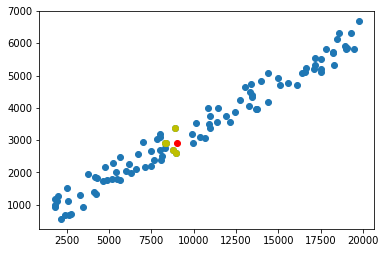

In [8]:
# Using the same data in Linear regression
knn_predict = knn_regression(X, y)
knn_predict(9000)

2849.7400000000002

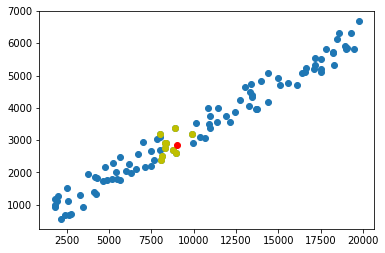

In [9]:
# try k=10
knn_predict(9000, 10)

#### 3. Re-code the Decision Tree, which could sort the features by salience. (12 points)

<评阅点>
> + 是否实现了信息熵 (1' )
+ 是否实现了最优先特征点的选择(5')
+ 是否实现了持续的特征选则(6')

信息熵：
$$ H(X)=-\sum_{i=1}^{n} p(x_i)log(p(x_i)) $$

In [10]:
from collections import Counter

In [11]:
def entropy(elements:list):
    counter = Counter(elements)
    probs = [counter[c] / len(elements) for c in set(elements)]
    return - sum(p * np.log(p) for p in probs)

In [12]:
entropy([1,1,0,0])

0.6931471805599453

In [13]:
import pandas as pd

In [14]:
def find_best_spliter(training_data, target: str) -> str:
    """Sort the features by salience (defined by entropy) and return the best feature in string
    Args:
        training_data: the training data (xi, yi)
        target: the target feature or element of data
    Returns:
        the best feature of training data
    """
    features = set(training_data.columns.tolist()) - {target}  #
    spliters = list()
    
    for f in features:
        values = set(training_data[f])
        entropy_v = sum(entropy(training_data[training_data[f] == v][target].tolist()) for v in values)
        ic(f)
        ic(values)
        ic(entropy_v)
        spliters.append([f, values, entropy_v])
    
    spliters.sort(key=lambda x:x[2])
    ic(spliters)
    return spliters[0][0]
    

In [15]:
# Using the mock data in class
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}
dataset = pd.DataFrame.from_dict(mock_data)

In [16]:
find_best_spliter(dataset, 'bought')

ic| f: 'income'
ic| values: {'-10', '+10'}
ic| entropy_v: 0.6730116670092565
ic| f: 'family_number'
ic| values: {1, 2}
ic| entropy_v: 0.6730116670092565
ic| f: 'gender'
ic| values: {'F', 'M'}
ic| entropy_v: 1.198849312913621
ic| spliters: [['income', {'-10', '+10'}, 0.6730116670092565],
               ['family_number', {1, 2}, 0.6730116670092565],
               ['gender', {'F', 'M'}, 1.198849312913621]]


'income'

In [17]:
find_best_spliter(dataset[dataset['income'] == '+10'], 'bought')

ic| f: 'income'
ic| values: {'+10'}
ic| entropy_v: 0.6730116670092565
ic| f: 'family_number'
ic| values: {1, 2}
ic| entropy_v: 0.5623351446188083
ic| f: 'gender'
ic| values: {'F', 'M'}
ic| entropy_v: 0.6365141682948128
ic| spliters: [['family_number', {1, 2}, 0.5623351446188083],
               ['gender', {'F', 'M'}, 0.6365141682948128],
               ['income', {'+10'}, 0.6730116670092565]]


'family_number'

#### 4. Finish the K-Means using 2-D matplotlib (8 points)

<评阅点>
> + 是否完成了KMeans模型，基于scikit-learning (3')
+ 是否完成了可视化任务（5'）

In [18]:
from sklearn.cluster import KMeans
from collections import 

SyntaxError: invalid syntax (<ipython-input-18-2b96eac23c37>, line 2)

In [ ]:
def kmeans_for_2d(training_data: pd.DataFrame, n_clusters: int, max_iter=500):
    # fit the model
    cluster = KMeans(n_clusters=n_clusters, max_iter=max_iter)
    cluster.fit(training_data)
    
    # visualization
    plt.figure(1) # graph1
    plt.scatter(training_data[:,0], training_data[:,1])
    plt.title('Before training')
    
    plt.figure(2) # gragh2
    plt.title('After training')
    color = ['black', 'red', 'orange', 'yellow', 'green', 'aqua', 
             'royalblue', 'darkblue', 'purple', 'pink'] # assume centers are no more than 10
    # draw the points after training
    for location, i in zip(training_data, cluster.labels_):
        plt.scatter(*location, c=color[i])
    # draw the centers
    for center in cluster.cluster_centers_:
        plt.scatter(*center, s=100)

In [ ]:
# generate testing data
X = [random.randint(0, 500) for _ in range(100)]
Y = [random.randint(0, 500) for _ in range(100)]
dataset = np.array([[x, y] for x, y in zip(X, Y)])

In [ ]:
kmeans_for_2d(dataset, 5)

## Part-2 Question and Answer 问答

#### 1. What's the *model*? why  all the models are wrong, but some are useful? (5 points) 

Ans:

<评阅点>
> + 对模型的理解是否正确,对模型的抽象性是否正确(5')

1. 模型指对问题、现象、客观事物或者规律进行抽象后的表达方式
2. 因为模型是抽象之后的产物，只保留了主要的信息或者有用的信息，所以所有的模型都不能完全代表原本的事物；但也正因为模型是抽象后的产物，过滤掉了很多对分析没有帮助的信息，保留了少量有用的信息，所以对分析问题、理解客观事物以及发现规律很有帮助

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)

Ans:

<评阅点>
> + 对过拟合和欠拟合的理解是否正确 (3')
+ 对欠拟合产生的原因是否理解正确(2')
+ 对过拟合产生的原因是否理解正确(5')

- 欠拟合 -> 模型未能学习数据中的关系 
- 欠拟合的产生原因 -> 对于给定数据集，大多数时候产生欠拟合的原因是模型过于简单，拟合函数能力不够。可以通过增加模型复杂度或者更换其他模型


- 过拟合 -> 模型在拟合函数时过分考虑了噪声等不必要的数据关联性，导致模型对训练集拟合十分好而对测试集的预测效果很差
- 过拟合的产生原因 -> 模型过于复杂；模型中的系数过大；训练用的数据太少；训练数据分析不均匀

#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

Ans:

<评阅点>
> + 对precision, recall, AUC, F1, F2 理解是否正确(6‘)
+ 对precision, recall, AUC, F1, F2的使用侧重点是否理解正确 (6’)

- Confusion Matrix(混淆矩阵):
<table>
    <tr>
        <th rowspan="2">Actual</th>
        <th colspan="2">Predict</th>
    </tr>
    <tr>
        <td>Positive</td>
        <td>Negative</td>
    </tr>
    <tr>
        <td>True</td>
        <td>TP(True Positive)</td>
        <td>FN(False Negative)</td>
    </tr>
    <tr>
        <td>False</td>
        <td>FP(False Positive)</td>
        <td>TN(True Negative)</td>
    </tr>
</table>

- <u>Precision(精度)</u> -> 所有预测为True的样本中实际为True的比例
$$ Precision=\frac{TP}{TP+FP} $$
当我们希望尽量不把False判断为True时么，Precision越高越好。举个例子，假设去买10个玉石的原石，100个中有20个是真玉石，其他都是普通石头，而买原石的成本很高，那我们希望买到的10个原石全是真玉石，也就是Precision = 1


- <u>Recall(召回率)</u> -> 所有实际为True的样本中被预测为True的比例
$$ Recall=\frac{TP}{TP+FN} $$
当我们希望把所有实际为True的样本都预测为True时，Recall越高越好。也举个例子，假设雷达侦测到30个可疑信号，其中3个是导弹信号，其他是干扰信号，那我们肯定希望把3个导弹信息全部标记出来，也就是Recall = 1


- <u>AUC(Area under Curve of ROC)</u> -> AUS最直接的定义就是ROC曲线下的面积，但是这个定义没有具体的意义。方便理解的定义是：对于一个二分类模型，随机给定一个正样本和一个负样本，分类器输出该正样本为正的概率值比分类器输出该负样本为正的概率值要大的可能性
    - 如果要理解AUC，必须先弄懂<u>ROC</u> -> ROC曲线的x轴为FPR(False Positive Rate), y轴为TPR(True Positive Rate), 具体定义为：
    $$ FPR=\frac{FP}{FP+TN} $$
    $$ TPR=\frac{TP}{TP+FN} $$
    - 机器学习中的ROC是如何画出来的 -> 混淆矩阵的使用或者准确率(Accuracy)的计算都需要对样本进行分类，但是在实际分析中，很多时候我们计算的结果是样本分类的概率，这样的话，就需要引入一个阈值。但是阈值的选取会很大程度上影响准确率以及混淆矩阵的结果。ROC是在取不同阈值情况下FPR和TPR在2d图中的点相连后的曲线，而曲线下的面积就是AUC。
    - 一般情况下，在样本非常不均匀的情况下使用AUC会有比较好的效果，比如在反欺诈场景中，设置欺诈行为是True，但是占比很少(假设0.1%)，那么只要把所有样本判断为False，准确率将高达99.9%，而AUC下将所有样本判断为False，AUC为0.5


- <u>F-Score</u> -> 在理想情况下，我们都希望Precision和Recall都高。虽然Precision和Recall在公式上并没有必然的相关性，但是在实际情况下，很多时候这两个指标往往是相互制约的。所以，我们需要对这两个指标进行取舍，根据实际情况分配不同的权重，于是引入F-Score:
$$ F\!-\!Score=(1+\beta^2)\cdot\frac{Precision\cdot Recall}{\beta^2\cdot Precision+Recall} $$
    - 当 $ \beta=1 $ 时，我们认为Precision和Recall同等重要，此时被称为F1-Score
    - 当 $ \beta>1 $ 时，我们认为Recall更加重要，此时被称为F2-Score

#### 4. Based on our course and yourself mind, what's the machine learning?  (8')

Ans:

<评阅点> 开放式问题，是否能说出来机器学习这种思维方式和传统的分析式编程的区别（8'）

>&emsp;&emsp;我不是科班出身的，所以对传统的分析式编程的具体含义不是很了解，网上也搜不到相关内容，所以就简单的写一下我接触机器学习这个概念前后我在解决一个问题时思维方式的变化吧。<br>
&emsp;&emsp;以预测房价为例，传统的思维方式是，找到和房价相关的变量，然后通过回归等方式拟合出一个函数，并且在对函数本身进行解释的同时对函数的预测能力进行评价解释；在机器学习的思维模式下，虽然同样会进行建模，拟合函数，但是不需要对函数进行解释，也不需要对函数的预测结果进行解释，只需要评价函数的拟合效果和预测能力。<br>
&emsp;&emsp;这两者之间最大的差别在于，传统思维模式下，我们认为如果一个函数能很好的预测新数据，那么就需要对我们拟合的函数进行解释，甚至还要和我们的认知进行对比，比如房价和房子的总面积正相关是合理的，但是如果房价和总面积的三次方正相关，那么我们可能会觉得有点难以解释，假设如果房价和销售当月总放晴天数正相关，那我们会觉得这可能存在问题。另外，在传统的思维模式下，我们会主动筛除那些我们认为根本不相关的变量。但是如果使用机器学习，我们不在乎为什么<u>总面积*客厅面积/厨房面积</u>会对房价产生影响，不需要解释为什么模型是这样的，为什么这些变量是有效的，只要拟合模型效果好，有预测能力，那就是一个有用的模型，而且，数据越多，变量越多(在保证拟合效果的前提下)，机器学习的效果就越好。

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

<评阅点> 开放式问题，主要看能理解评价指标对机器学习模型的重要性.

>我同意这个观点。对于一个机器学习任务而言，会有很多不同模型的选择，这些模型都能在一定程度上拟合训练数据，但是我们希望能找一个最优的模型，这时一个正确的评价指标就尤为重要。如果评价指标不准确，就会导致选择错误的模型，甚至把整个机器学习的优化导向错误的方向。而且评价模型的指标有很多种，需要根据不同的模型，不同的问题环境，不同的目标进行选择，可以说定义了模型的评价标准就等于是确定了机器学习目标的方向。

## Part-03 Programming Practice 编程练习

1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a **completed** Decision Tree Model. You show finish a `predicate()` function, which accepts three parameters **<gender, income, family_number>**, and outputs the predicated 'bought': 1 or 0.  (20 points)

In [ ]:
# Restructure find_best_spliter function
def best_spliter(training_data, features, target: str) -> str:
    """Sort the features by salience (defined by entropy) and return the best feature in string
    Args:
        training_data: the training data (xi, yi)
        features: unused spliters
        target: the target feature or element of data
    Returns:
        the best feature of training data
    """
    spliters = list()
    
    for f in features:
        values = set(training_data[f])
        entropy_v = sum(entropy(training_data[training_data[f] == v][target].tolist()) for v in values)
        spliters.append([f, values, entropy_v])
    
    spliters.sort(key=lambda x:x[2])
    return spliters[0][0]

In [ ]:
def decision_tree(training_data: pd.DataFrame, target:str, criterion=entropy):
    """Fit the data on decision model and return the predict function
    Args: 
        training_data: the data in pd.DataFrame structure
        target: the target column's title
        criterion: the function to sort the feature. Default is entropy I defined before
    Returns:
        predict function
    """
    features = set(training_data.columns.tolist()) - {target}
    
    def get_tree(data, features_unused):
        spliter = best_spliter(data, features_unused, target) # get the best spliter
        values = set(training_data[spliter])
        features_unused -= {spliter}
        return [spliter] + [get_details(spliter, value, data,features_unused) for value in values]
    
    def get_details(spliter, value, data, features_unused):
        entropy = criterion(data[data[spliter] == value][target].tolist())
        # entropy == 0, return the target value of this group
        if entropy == 0:
            return [value, entropy, data[data[spliter] == value][target].tolist()[0]]
        # entropy != 0, and no more spliters, return the highest probablity value
        if not features_unused:
            return [value, entropy, majority(data[data[spliter] == value][target].tolist())]
        # keep splitting
        return [value, entropy, get_tree(data[data[spliter] == value], features_unused)]
    
    def majority(data):
        count = dict()
        for v in data:
            if v not in count:
                count[v] = 1
            else:
                count[v] += 1
        return max(count, key=count.get)
    
    tree = get_tree(training_data, features)
    ic(tree)
    
    def predict_func(data):
        # search the tree until find the target value
        def next_node(data, tree):
            node = tree[0]
            for sub_tree in tree[1:]:
                if data[node] == sub_tree[0]:
                    if isinstance(sub_tree[2], int):
                        return sub_tree[2]
                    else:
                        return next_node(data, sub_tree[2])
        return next_node(data, tree)
    return predict_func

In [ ]:
# Using the mock data in class
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}
dataset = pd.DataFrame.from_dict(mock_data)

In [ ]:
model = decision_tree(dataset, 'bought')

In [ ]:
model({'gender': 'M', 'income': '-10', 'family_number': 1})

In [ ]:
model({'gender': 'F', 'income': '+10', 'family_number': 2})

In [ ]:
model({'gender': 'M', 'income': '+10', 'family_number': 1})

<评阅点>
> + 是否将之前的决策树模型的部分进行合并组装， predicate函数能够顺利运行(8')
+ 是够能够输入未曾见过的X变量，例如gender, income, family_number 分别是： <M, -10, 1>, 模型能够预测出结果 (12')

2. 将上一节课(第二节课)的线性回归问题中的Loss函数改成"绝对值"，并且改变其偏导的求值方式，观察其结果的变化。(19 point)

New loss function
$$ loss=\frac{1}{n}\sum \left|y_i-\hat{y_i}\right|=\frac{1}{n}\sum \sqrt{(y_i-\hat{y_i})^2}$$
$$ loss=\frac{1}{n}\sum \left|y_i-(kx_i+b)\right|=\frac{1}{n}\sum \sqrt{(y_i-(kx_i+b))^2} $$

In [ ]:
def loss(y, y_hat):
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(y, y_hat)) / len(list(y))

Partial Derivatives
$$ \frac{\partial{loss}}{\partial{k}}=\frac{1}{n}\sum -x_i\frac{y_i-\hat{y_i}}{\left|y_i-\hat{y_i}\right|} $$
$$ \frac{\partial{loss}}{\partial{b}}=\frac{1}{n}\sum -\frac{y_i-\hat{y_i}}{\left|y_i-\hat{y_i}\right|} $$

In [ ]:
def partial_k(x, y, y_hat):
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(x, y, y_hat):
        gradient += (-x_i) * (y_i - y_hat_i) / abs(y_i - y_hat_i)
    return 1 / n * gradient

def partial_b(y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(y, y_hat):
        gradient -= (y_i - y_hat_i) / abs(y_i - y_hat_i)
    return 1 / n * gradient

In [ ]:
from sklearn.datasets import load_boston
import random

In [ ]:
# generate data
dataset = load_boston()
x, y=dataset['data'], dataset['target']
X_rm = x[:,5]

In [ ]:
#define target function
def price(rm, k, b):
    return k * rm + b

In [ ]:
#initialized parameters

k = random.random() * 200 - 100  # -100 100
b = random.random() * 200 - 100  # -100 100

learning_rate = 1e-2

iteration_num = 1000 
losses = []
for i in range(iteration_num):
    
    price_use_current_parameters = [price(r, k, b) for r in X_rm]  # \hat{y}
    
    current_loss = loss(y, price_use_current_parameters)
    losses.append(current_loss)
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_k(X_rm, y, price_use_current_parameters)
    b_gradient = partial_b(y, price_use_current_parameters)
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
best_k = k
best_b = b

In [ ]:
plt.plot(list(range(iteration_num)),losses)

In [ ]:
price_use_best_parameters = [price(r, best_k, best_b) for r in X_rm]

plt.scatter(X_rm,y)
plt.scatter(X_rm,price_use_current_parameters)

<评阅点>
+ 是否将Loss改成了“绝对值”(3')
+ 是否完成了偏导的重新定义(5')
+ 新的模型Loss是否能够收敛 (11’)